In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from pandas import read_csv

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
solusi_data = read_csv('/content/drive/MyDrive/Galaxy training_solutions_rev1.csv')
image_data_galaksi = '/content/drive/MyDrive/images_galaxy/'
sd = solusi_data
img = image_data_galaksi

In [ ]:
#data = np.empty((0,96,96,3))
#for (root, dirs, files) in os.walk(img):
  #for i in range(0,data_train):
    #files = sorted(files, key=str)
    #path = os.path.join(root, files[i])
    #imgs = tf.keras.preprocessing.image.load_img(path, target_size=(96, 96))
    #image = tf.keras.preprocessing.image.img_to_array(imgs)
    #image = np.expand_dims(image, axis=0)
    #image /= 255.0
    #data = np.vstack((data,image))

#data di-save
#np.save("/content/drive/MyDrive/Tugas_TA/data_mentah", data)

#data yang sudah di-save di GDrive di-load ulang
data = np.load("/content/drive/MyDrive/TugasTA/data_mentah96x96.npy")

In [ ]:
j = 1      # iterasi awal untuk kolom pertama ; j+3 = iterasi syarat ke-2 ; j+5 = iterasi syarat ke-3
k = 14     # iterasi syarat ke-2 
l = 8     # iterasi syarat ke-4

data_train = 9000
label = []
for i in range(0, data_train):
  id_galaxy = sd._get_value(i,0, takeable = True)   # nama ID galaksi 
  a = np.array(sd.iloc[i,j:(j+3)])                  # data syarat ke-1 dari 1.1 - 1.3
  b = np.array(sd.iloc[i,k:(k+2)])                  # data syarat ke-6 dari 6.1 - 6.2
  c = np.array(sd.iloc[i,l:(l+2)])                  # data syarat ke-4 dari 4.1 (index : l = 8) - 4.2

  if (sd._get_value(i,j, takeable = True) == max(a) and sd._get_value(i, (k+1), takeable = True) == max(b)): # syarat 1.1 dan 6.2
    label.append(a)
      
  elif (sd._get_value(i, (j+1), takeable = True) == max(a) and sd._get_value(i, l, takeable = True) == max(c)): # syarat 1.2 dan 4.1
    label.append(a)

  elif sd._get_value(i, (j+2), takeable = True) == max(a): # syarat 1.3 
    label.append(a)

  else:  
    label.append(a)
    
label = np.asarray(label)

In [ ]:
def load_dataset(): 
  
  classes = ['Elips', 'Spiral', 'Tidak Beraturan', 'Artifact']
  x = data
  y = label
             
  return x, y, classes

In [ ]:
x, y, classes = load_dataset()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size=0.3)

# Architecture #1

In [ ]:
model = Sequential(
    [
     layers.Conv2D(4, (3,3), padding='same', activation='relu', input_shape=(96, 96, 3)), 
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(64, (3,3), padding='same', activation='relu'),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Dropout(0.5),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.BatchNormalization(),
     layers.Dense(512, activation="relu"),
     layers.Dense(512, activation="relu"),
     layers.Dropout(0.5),
     layers.Dense(3, activation='softmax')
    ]
)                                              

model.compile(loss='huber', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 4)         112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        2368      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 flatten (Flatten)           (None, 36864)             0

In [ ]:
B = 8
ep = 30
history = model.fit(x_train, y_train, epochs=ep, validation_data=(x_test, y_test), batch_size=B)

Epoch 1/30
788/788 [==============================] - 144s 183ms/step - loss: 0.0221 - accuracy: 0.7024 - val_loss: 0.0224 - val_accuracy: 0.7093
Epoch 2/30
788/788 [==============================] - 144s 183ms/step - loss: 0.0172 - accuracy: 0.7643 - val_loss: 0.0249 - val_accuracy: 0.7244
Epoch 3/30
788/788 [==============================] - 144s 183ms/step - loss: 0.0156 - accuracy: 0.7729 - val_loss: 0.0316 - val_accuracy: 0.7430
Epoch 4/30
788/788 [==============================] - 144s 183ms/step - loss: 0.0150 - accuracy: 0.7865 - val_loss: 0.0260 - val_accuracy: 0.7044
Epoch 5/30
788/788 [==============================] - 144s 182ms/step - loss: 0.0141 - accuracy: 0.7859 - val_loss: 0.0270 - val_accuracy: 0.7281
Epoch 6/30
788/788 [==============================] - 144s 182ms/step - loss: 0.0132 - accuracy: 0.7992 - val_loss: 0.0296 - val_accuracy: 0.7211
Epoch 7/30
788/788 [==============================] - 144s 183ms/step - loss: 0.0128 - accuracy: 0.8011 - val_loss: 0.0270 -

# Architecture #2

In [ ]:
model2 = Sequential(
    [
     layers.Conv2D(18, (3,3), padding='same', activation='relu', input_shape=(96, 96, 3)),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(54, (3,3), padding='same', activation='relu'), 
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Dropout(0.5),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.BatchNormalization(),
     layers.Dense(512, activation="relu"),
     layers.Dense(512, activation="relu"),
     layers.Dropout(0.5),
     layers.Dense(3, activation='softmax')
    ]
)      

model2.compile(loss='huber', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 96, 96, 18)        504       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 18)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 54)        8802      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 54)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 54)        0         
                                                                 
 flatten_1 (Flatten)         (None, 31104)            

In [ ]:
B = 8
ep = 30
history2 = model2.fit(x_train, y_train, batch_size=B, validation_data=(x_test, y_test), epochs=ep)

Epoch 1/30
788/788 [==============================] - 150s 189ms/step - loss: 0.0242 - accuracy: 0.6867 - val_loss: 0.0244 - val_accuracy: 0.7081
Epoch 2/30
788/788 [==============================] - 148s 188ms/step - loss: 0.0196 - accuracy: 0.7379 - val_loss: 0.0256 - val_accuracy: 0.7259
Epoch 3/30
788/788 [==============================] - 148s 188ms/step - loss: 0.0177 - accuracy: 0.7576 - val_loss: 0.0299 - val_accuracy: 0.7200
Epoch 4/30
788/788 [==============================] - 148s 188ms/step - loss: 0.0168 - accuracy: 0.7594 - val_loss: 0.0345 - val_accuracy: 0.6870
Epoch 5/30
788/788 [==============================] - 148s 188ms/step - loss: 0.0161 - accuracy: 0.7665 - val_loss: 0.0363 - val_accuracy: 0.7044
Epoch 6/30
788/788 [==============================] - 148s 188ms/step - loss: 0.0155 - accuracy: 0.7770 - val_loss: 0.0322 - val_accuracy: 0.7011
Epoch 7/30
788/788 [==============================] - 148s 188ms/step - loss: 0.0146 - accuracy: 0.7816 - val_loss: 0.0344 -

# Architecture #3

In [ ]:
model3 = Sequential(
    [
     layers.Conv2D(4, (3,3), padding='same', activation='relu', input_shape=(96, 96, 3)), 
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(8, (3,3), padding='same', activation='relu'),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(16, (3,3), padding='same', activation='relu'),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Dropout(0.5),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(512, activation="relu"),
     layers.Dense(512, activation="relu"),
     layers.Dropout(0.5),
     layers.Dense(3, activation='softmax')
    ]
)                                              

model3.compile(loss='huber', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 96, 4)         112       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 4)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 8)         296       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 16)      

In [ ]:
B = 8
ep = 30
history3 = model3.fit(x_train, y_train, batch_size=B, validation_data=(x_test, y_test), epochs=ep)

Epoch 1/30
788/788 [==============================] - 44s 54ms/step - loss: 0.0243 - accuracy: 0.6483 - val_loss: 0.0180 - val_accuracy: 0.7544
Epoch 2/30
788/788 [==============================] - 42s 54ms/step - loss: 0.0208 - accuracy: 0.7160 - val_loss: 0.0199 - val_accuracy: 0.7107
Epoch 3/30
788/788 [==============================] - 42s 54ms/step - loss: 0.0196 - accuracy: 0.7341 - val_loss: 0.0159 - val_accuracy: 0.7826
Epoch 4/30
788/788 [==============================] - 43s 54ms/step - loss: 0.0187 - accuracy: 0.7527 - val_loss: 0.0166 - val_accuracy: 0.7674
Epoch 5/30
788/788 [==============================] - 43s 54ms/step - loss: 0.0183 - accuracy: 0.7514 - val_loss: 0.0162 - val_accuracy: 0.7741
Epoch 6/30
788/788 [==============================] - 42s 54ms/step - loss: 0.0177 - accuracy: 0.7602 - val_loss: 0.0157 - val_accuracy: 0.7796
Epoch 7/30
788/788 [==============================] - 42s 54ms/step - loss: 0.0175 - accuracy: 0.7610 - val_loss: 0.0164 - val_accuracy:

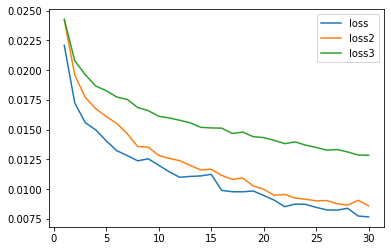

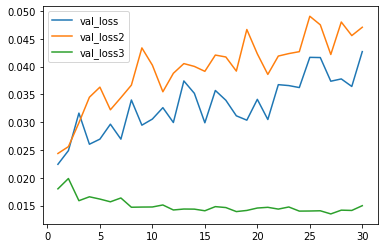

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epoch = range(1, len(loss)+1)

plt.plot(epoch, loss, label = 'loss') 
plt.plot(epoch, loss2, label = 'loss2') 
plt.plot(epoch, loss3, label = 'loss3') 
plt.legend()
plt.show()

print("\n")

plt.plot(epoch, val_loss, label = 'val_loss')
plt.plot(epoch, val_loss2, label = 'val_loss2')
plt.plot(epoch, val_loss3, label = 'val_loss3')
plt.legend()
plt.show()
